In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fzrox_path = '/Users/carlosolivares/data-visualization/data/FZROX.csv'
data = pd.read_csv(fzrox_path)[['Date', 'Close']]

In [3]:
data.head()

,Date,Close
0,2018-08-03,10.04
1,2018-08-06,10.08
2,2018-08-07,10.11
3,2018-08-08,10.10
4,2018-08-09,10.10


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
indexed_data = data.set_index('Date')
ts = indexed_data.Close

Text(0.5, 1.0, 'Closing Price of FZROX over 5 Years')

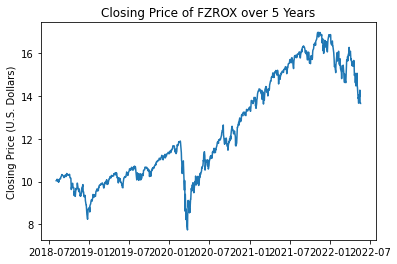

In [6]:
plt.plot(ts)
plt.ylabel("Closing Price (U.S. Dollars)")
plt.title('Closing Price of FZROX over 5 Years')

In [ ]:
## Ok this is pretty good. Now we just need to do this for all the other positions ou hold, make the plots better, 
## and put them in a nice subplots style thing
## The x-axis is pretty ugly looking right now. 

In [4]:
def prep_financial_data_for_plotting(path2csv):
    """
    Reformats a .csv file DOWNLOADED FROM
    YAHOO FINANCE into the format for 
    plotting
    """
    data = pd.read_csv(path2csv)[['Date', 'Close']]
    data['Date'] = pd.to_datetime(data['Date'])
    indexed_data = data.set_index('Date')
    ts = indexed_data.Close
    return ts

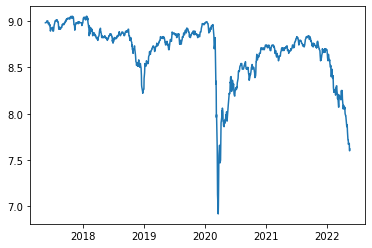

In [7]:
ts = prep_financial_data_for_plotting('/Users/carlosolivares/data-visualization/data/SPHIX.csv')
plt.plot(ts)

In [8]:
path2data = '/Users/carlosolivares/data-visualization/data/'
fzrox = prep_financial_data_for_plotting(os.path.join(path2data, 'FZROX.csv'))
fzilx = prep_financial_data_for_plotting(os.path.join(path2data, 'FZILX.csv'))
sphix = prep_financial_data_for_plotting(os.path.join(path2data, 'SPHIX.csv'))
qqq = prep_financial_data_for_plotting(os.path.join(path2data, 'QQQ.csv'))

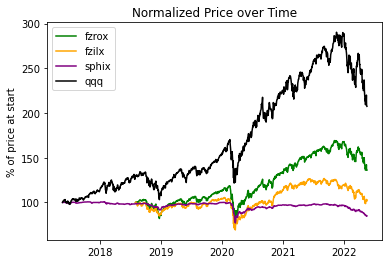

In [15]:
plt.plot((fzrox * 100)/fzrox[0], color='green', label='fzrox')
plt.plot((fzilx * 100)/fzilx[0], color='orange', label='fzilx')
plt.plot((sphix * 100)/sphix[0], color='purple', label='sphix')
plt.plot((qqq * 100)/qqq[0], color='black', label='qqq')
plt.title("Normalized Price over Time")
plt.ylabel("% of price at start")
plt.legend(loc="best")

In [ ]:
# This is good. Next up I want to edit the y axs to be %change from start price. 
# I also want to add vetical lines to indicate when I bought (at the individual plots level)
# then just for fun, make a plot of all individual ones and this unified one in the enter